In [2]:
''' The goal of this is to create a pandas data frame and .csv
that holds the population for each day of the last five years
first column dates, second column pop, simple

some help from https://pythonspot.com/en/read-xls-with-pandas/
pandas.read_excel doc http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html


'''

from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import math

%matplotlib inline 

# year variable
year = 2012

pop_list = []
dates_index = []



# check what happened
# print(df.index[3])

# try to get at one date
# date = df.index[month] + ' ' + str(day) + ', ' + str(year)
# daily_pop = df.iloc[month][day]

# print(daily_pop)
# print(date)
while year < 2018:
    
    # reads file
    file = str(year) + ' Total Pop.xls'
    df = pd.read_excel(file, header=0, skip_footer=14)
    
    # set counter
    month = 0
    
    while month < 12:
        day = 1
        while day < 32:
            date = df.index[month] + ' ' + str(day) + ', ' + str(year)
            if math.isnan(df.iloc[month][day]) == False:
                
                # old code to check if it works
                daily_pop = df.iloc[month][day]
                # print(date + ' = ' + str(daily_pop))
                
                # add to date and pop lists
                dates_index.append(pd.to_datetime(date))
                pop_list.append(daily_pop)             
                
            day += 1
        
        month += 1
    year += 1

# checking if it works, it does
# print(pop_list)
# print(dates_index)

# make data frame

d = { 'daily pop' : pd.Series(pop_list, index = dates_index)}
df = pd.DataFrame(d)
# print(df)

In [15]:
# save as a csv while we're at it
df.to_csv('jail_pop_data.csv')

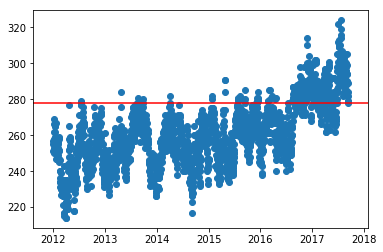

In [7]:
# visualize it
# scatter plot of everything
plt.scatter(df.index, df['daily pop'])
plt.axhline(y=278, color='r')

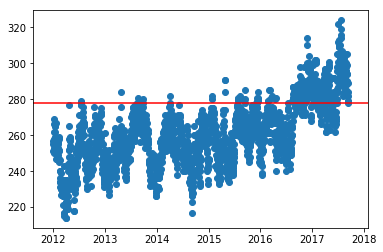

In [8]:
# save fig
plt.scatter(df.index, df['daily pop'])
plt.axhline(y=278, color='r')
plt.savefig('pop_scatter_wline.png')